In [1]:
import sys
import os
import glob
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
INPUT_FOLDER = '../ryan_audio/les_mis/'
OUTPUT_NAME = 'les_mis.mp3'

In [3]:
# Get all audio files into single array
for i,f in enumerate(glob.glob(INPUT_FOLDER+'*')):
    temp, sr = librosa.load(f,sr=None)
    if i == 0:
        final = temp
    else:
        final = np.concatenate((final,temp))

In [4]:
# Save array
librosa.output.write_wav(OUTPUT_NAME,final,sr)

Open Audacity and split

In [5]:
LANGUAGE_CODE = 'fr'
BOOK_TITLE = 'lesmis'
LABELS_NAME = 'lesmis_labels.txt'

In [6]:
# Make language directory
os.system('mkdir '+LANGUAGE_CODE)

256

In [7]:
# Make book directory
os.system('mkdir '+LANGUAGE_CODE+'/'+BOOK_TITLE)

0

In [8]:
# Read silences
silences = np.array(pd.read_csv(LABELS_NAME,delimiter='\t',header=None).iloc[:,0])

In [9]:
# Split data and write
for i,s in tqdm(enumerate(silences)):
#     if i < 10:
    if i == 0:
        prev_cursor = 0
    curr_cursor = int(sr*s)
    clip = final[prev_cursor:curr_cursor]
    output_num = str(i).zfill(4)
    librosa.output.write_wav(LANGUAGE_CODE+'/'+BOOK_TITLE+'/'+BOOK_TITLE+output_num,clip,sr)
    prev_cursor = curr_cursor
    

11099it [00:11, 950.90it/s]


In [10]:
# Get statistics
durations = []
for i,s in tqdm(enumerate(silences)):
#     if i < 10:
    if i == 0:
        prev_cursor = 0
    curr_cursor = s
    durations.append(curr_cursor-prev_cursor)
    prev_cursor = curr_cursor

11099it [00:00, 476168.16it/s]


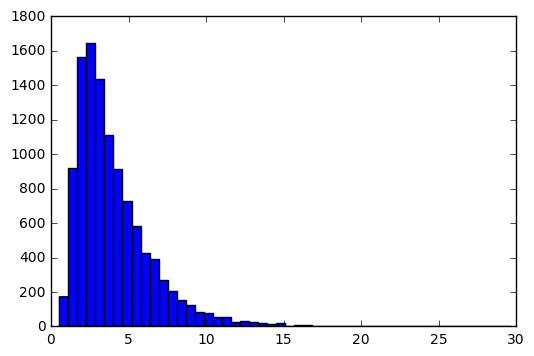

In [11]:
plt.hist(durations,bins=50)
plt.show()

In [45]:
durations = np.array(durations)
durations[durations>10].sum()/3600

1.1917304108333309

In [12]:
# Remake data using Kyubyong method
ref_len = 10. * sr # We controls the length of each clip such that it is close to this.
min_len = 1. * sr # We ignore a split point if it causes an audio clip under 5 1 sec.

# Make book directory
os.system('mkdir '+LANGUAGE_CODE+'/'+BOOK_TITLE+'_Kyubyong')

# Save durations
durations_k = []

# Create new splitpoints
cursor, _nsamples, filtered = 0, 0, []
for s in [int(sil*sr) for sil in silences] :
    nsamples = s - cursor
    if nsamples > ref_len and _nsamples > min_len:
        cursor = _s
        filtered.append(cursor/sr)
        nsamples = s - cursor

    _nsamples, _s = nsamples, s

# Split data and write
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = int(sr*s)
    clip = final[prev_cursor:curr_cursor]
    output_num = str(i).zfill(4)
    librosa.output.write_wav(LANGUAGE_CODE+'/'+BOOK_TITLE+'_Kyubyong'+'/'+BOOK_TITLE+output_num,clip,sr)
    prev_cursor = curr_cursor


5601it [00:17, 318.71it/s]


In [13]:
# Get statistics
durations_k = []
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = s
    durations_k.append(curr_cursor-prev_cursor)
    prev_cursor = curr_cursor

5601it [00:00, 595842.87it/s]


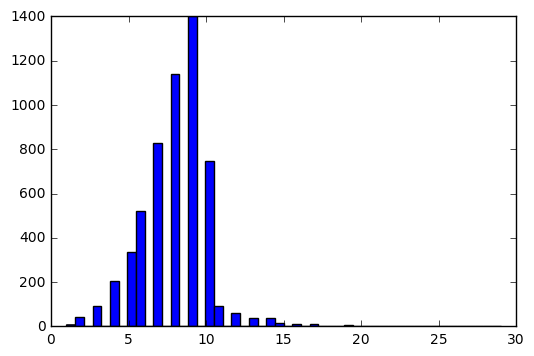

In [14]:
plt.hist(durations_k,bins=50)
plt.show()

In [35]:
# tommy style: just center around 5 sec

ref_len = 12. # We controls the length of each clip such that it is close to this.
min_len = 1. # We ignore a split point if it causes an audio clip under 5 1 sec.

# Make book directory
os.system('mkdir '+LANGUAGE_CODE+'/'+BOOK_TITLE+'_Tommy')


# Create new splitpoints
filtered = []
start_cursor = 0
prev_cursor = 0
for s in silences:
    cur_len = s-start_cursor
    if cur_len > ref_len:
        filtered.append(prev_cursor)
        start_cursor = prev_cursor
    prev_cursor = s



# cursor, _nsamples, filtered, _s = 0, 0, [], 0
# for s in [int(sil*sr) for sil in silences] :
#     nsamples = s - cursor
#     if nsamples > ref_len:
#         cursor = _s
#         filtered.append(cursor/sr)
#         nsamples = s - cursor

#     _nsamples, _s = nsamples, s

# Split data and write
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = int(sr*s)
    clip = final[prev_cursor:curr_cursor]
    output_num = str(i).zfill(4)
    librosa.output.write_wav(LANGUAGE_CODE+'/'+BOOK_TITLE+'_Tommy'+'/'+BOOK_TITLE+output_num,clip,sr)
    prev_cursor = curr_cursor

4619it [00:09, 488.59it/s]


In [36]:
# Get statistics
durations_t = []
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = s
    durations_t.append(curr_cursor-prev_cursor)
    prev_cursor = curr_cursor

4619it [00:00, 579610.78it/s]


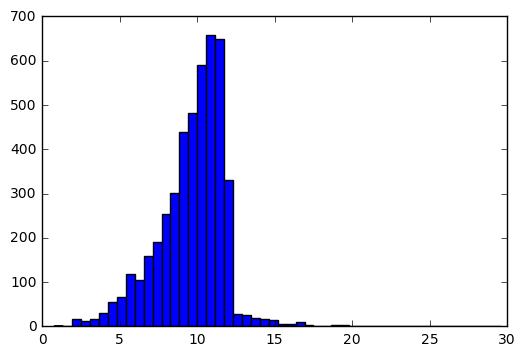

In [37]:
plt.hist(durations_t,bins=50)
plt.show()

In [39]:
durations_t = np.array(durations_t)

In [43]:
durations_t[durations_t>10].sum()/3500

7.6407373862856796